In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import networkx as nx

### Import data

In [2]:
orphans = pd.read_csv(r'E_WEB LIST OF ORPHANS _12 DELIN 03.31.2020.csv')
data = gpd.read_file(r'Wells\well163\well163b.shp')
basemap = gpd.read_file(r'Maps\Basemap163\road163l.shp')

### Define distance calculator

In [3]:
R_EARTH = 3958.8  #miles

# Use formula: angle (radians) * R_EARTH
def angleToDist(x, y): # Input: tuples x and y (lat. and long.)
    a = math.sqrt( (y[0]-x[0])**2 + (y[1]-x[1])**2 )
    return R_EARTH * (math.pi/180) * a

### Combining well datasets

In [4]:
orphans[orphans['COUNTY_NAME']=='FRIO']

,DISTRICT_NAME,COUNTY_NAME,FIELD_NAME,OPERATOR_NAME,OPERATOR_NO,LEASE_NAME,OG_CODE,LEASE_ID,WELL_NO,API,WB_Months_Inactive
34,01,FRIO,BIG FOOT,U.S. JIMOIL CORPORATION,875447,"BOHL, ANNIE",O,71,3,16300093,279
35,01,FRIO,BIG FOOT,U.S. JIMOIL CORPORATION,875447,"BOHL, ANNIE",O,71,2,16300144,279
1055,01,FRIO,BEAR CREEK,"AMERICAN EAGLE RESOURCES, INC.",17974,DAVIDSON,O,3184,1,16300114,279
1576,01,FRIO,PEARSALL (AUSTIN CHALK),"STRATCO OPERATING CO., INC.",825462,"MILLS, J. C.",O,4669,1,16330226,239
1577,01,FRIO,PEARSALL (AUSTIN CHALK),"STRATCO OPERATING CO., INC.",825462,"MILLS, J. C.",O,4669,2,16330238,279
1607,01,FRIO,PEARSALL (AUSTIN CHALK),"MCRAE HORIZONTAL DRILLING, INC.",555897,MANNAS AND JOHNSTON -A-,O,4755,A 1,16380416,279
1740,01,FRIO,PEARSALL (AUSTIN CHALK),WOOLDRIDGE OIL & GAS,940466,"CULPEPPER, CURTIS L.",O,5104,1H,16330580,277
1783,01,FRIO,PEARSALL (AUSTIN CHALK),GINCO OPERATING CO.,307228,"BOOTH, F. I. -C-",O,5255,2,16331046,279
1784,01,FRIO,PEARSALL (AUSTIN CHALK),GINCO OPERATING CO.,307228,"BOOTH, F. I. -C-",O,5255,3,16331538,279
2299,01,FRIO,PEARSALL (AUSTIN CHALK),"GOLDEN CHILD, INC.",312739,TURNHAM-ASTRO NCT-1,O,6858,1,16380528,279


In [5]:
ata_orp = orphans.query('COUNTY_NAME == "FRIO"')

wellid = []
for i in ata_orp.index.values:
    wellid.append(str(ata_orp.API[i])[-5:])
    
ata_orp['WELLID'] = wellid

spatial = data.merge(ata_orp, how='right', on='WELLID')

C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
spatial # notice index==1 has mostly NaN values - if a datapoint has no coordinates, then we can't really work with it

,BOTTOM_ID,SURFACE_ID,SYMNUM,APINUM,RELIAB,API10,API_x,LONG27,LAT27,LONG83,...,COUNTY_NAME,FIELD_NAME,OPERATOR_NAME,OPERATOR_NO,LEASE_NAME,OG_CODE,LEASE_ID,WELL_NO,API_y,WB_Months_Inactive
0,240527.0,240527.0,4.0,4216300093,15,16300093,16300093,-98.877728,29.009448,-98.878034,...,FRIO,BIG FOOT,U.S. JIMOIL CORPORATION,875447,"BOHL, ANNIE",O,71,3,16300093,279
1,239987.0,239987.0,4.0,4216300144,15,16300144,16300144,-98.867733,29.006007,-98.868037,...,FRIO,BIG FOOT,U.S. JIMOIL CORPORATION,875447,"BOHL, ANNIE",O,71,2,16300144,279
2,239934.0,239934.0,4.0,4216300114,15,16300114,16300114,-98.825346,29.088288,-98.825649,...,FRIO,BEAR CREEK,"AMERICAN EAGLE RESOURCES, INC.",17974,DAVIDSON,O,3184,1,16300114,279
3,148298.0,148298.0,4.0,4216330226,15,16330226,16330226,-99.001310,28.828887,-99.001619,...,FRIO,PEARSALL (AUSTIN CHALK),"STRATCO OPERATING CO., INC.",825462,"MILLS, J. C.",O,4669,1,16330226,239
4,1061465.0,1061465.0,4.0,4216330238,15,16330238,16330238,-98.996953,28.824648,-98.997262,...,FRIO,PEARSALL (AUSTIN CHALK),"STRATCO OPERATING CO., INC.",825462,"MILLS, J. C.",O,4669,2,16330238,279
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FRIO,PEARSALL (AUSTIN CHALK),"MCRAE HORIZONTAL DRILLING, INC.",555897,MANNAS AND JOHNSTON -A-,O,4755,A 1,16380416,279
6,146389.0,146389.0,4.0,4216330580H2,15,16330580H2,16330580,-99.066932,28.747097,-99.067242,...,FRIO,PEARSALL (AUSTIN CHALK),WOOLDRIDGE OIL & GAS,940466,"CULPEPPER, CURTIS L.",O,5104,1H,16330580,277
7,146457.0,146389.0,4.0,4216330580H1,15,16330580H1,16330580,-99.066278,28.746610,-99.066588,...,FRIO,PEARSALL (AUSTIN CHALK),WOOLDRIDGE OIL & GAS,940466,"CULPEPPER, CURTIS L.",O,5104,1H,16330580,277
8,133135.0,133135.0,4.0,4216331046,15,16331046,16331046,-98.892051,28.800005,-98.892357,...,FRIO,PEARSALL (AUSTIN CHALK),GINCO OPERATING CO.,307228,"BOOTH, F. I. -C-",O,5255,2,16331046,279
9,133071.0,133071.0,4.0,4216331538,15,16331538,16331538,-98.888087,28.802482,-98.888392,...,FRIO,PEARSALL (AUSTIN CHALK),GINCO OPERATING CO.,307228,"BOOTH, F. I. -C-",O,5255,3,16331538,279


In [7]:
spatial_valid = spatial[spatial['LONG83']<-90]
spatial_valid

,BOTTOM_ID,SURFACE_ID,SYMNUM,APINUM,RELIAB,API10,API_x,LONG27,LAT27,LONG83,...,COUNTY_NAME,FIELD_NAME,OPERATOR_NAME,OPERATOR_NO,LEASE_NAME,OG_CODE,LEASE_ID,WELL_NO,API_y,WB_Months_Inactive
0,240527.0,240527.0,4.0,4216300093,15,16300093,16300093,-98.877728,29.009448,-98.878034,...,FRIO,BIG FOOT,U.S. JIMOIL CORPORATION,875447,"BOHL, ANNIE",O,71,3,16300093,279
1,239987.0,239987.0,4.0,4216300144,15,16300144,16300144,-98.867733,29.006007,-98.868037,...,FRIO,BIG FOOT,U.S. JIMOIL CORPORATION,875447,"BOHL, ANNIE",O,71,2,16300144,279
2,239934.0,239934.0,4.0,4216300114,15,16300114,16300114,-98.825346,29.088288,-98.825649,...,FRIO,BEAR CREEK,"AMERICAN EAGLE RESOURCES, INC.",17974,DAVIDSON,O,3184,1,16300114,279
3,148298.0,148298.0,4.0,4216330226,15,16330226,16330226,-99.001310,28.828887,-99.001619,...,FRIO,PEARSALL (AUSTIN CHALK),"STRATCO OPERATING CO., INC.",825462,"MILLS, J. C.",O,4669,1,16330226,239
4,1061465.0,1061465.0,4.0,4216330238,15,16330238,16330238,-98.996953,28.824648,-98.997262,...,FRIO,PEARSALL (AUSTIN CHALK),"STRATCO OPERATING CO., INC.",825462,"MILLS, J. C.",O,4669,2,16330238,279
6,146389.0,146389.0,4.0,4216330580H2,15,16330580H2,16330580,-99.066932,28.747097,-99.067242,...,FRIO,PEARSALL (AUSTIN CHALK),WOOLDRIDGE OIL & GAS,940466,"CULPEPPER, CURTIS L.",O,5104,1H,16330580,277
7,146457.0,146389.0,4.0,4216330580H1,15,16330580H1,16330580,-99.066278,28.746610,-99.066588,...,FRIO,PEARSALL (AUSTIN CHALK),WOOLDRIDGE OIL & GAS,940466,"CULPEPPER, CURTIS L.",O,5104,1H,16330580,277
8,133135.0,133135.0,4.0,4216331046,15,16331046,16331046,-98.892051,28.800005,-98.892357,...,FRIO,PEARSALL (AUSTIN CHALK),GINCO OPERATING CO.,307228,"BOOTH, F. I. -C-",O,5255,2,16331046,279
9,133071.0,133071.0,4.0,4216331538,15,16331538,16331538,-98.888087,28.802482,-98.888392,...,FRIO,PEARSALL (AUSTIN CHALK),GINCO OPERATING CO.,307228,"BOOTH, F. I. -C-",O,5255,3,16331538,279
11,147481.0,147481.0,4.0,4216331980,15,16331980,16331980,-99.338017,28.691224,-99.338333,...,FRIO,PEARSALL (AUSTIN CHALK),SOTEX OIL & GAS CORP.,802661,WRIGHT,O,7276,1,16331980,279


Text(101.625, 0.5, 'latitude')

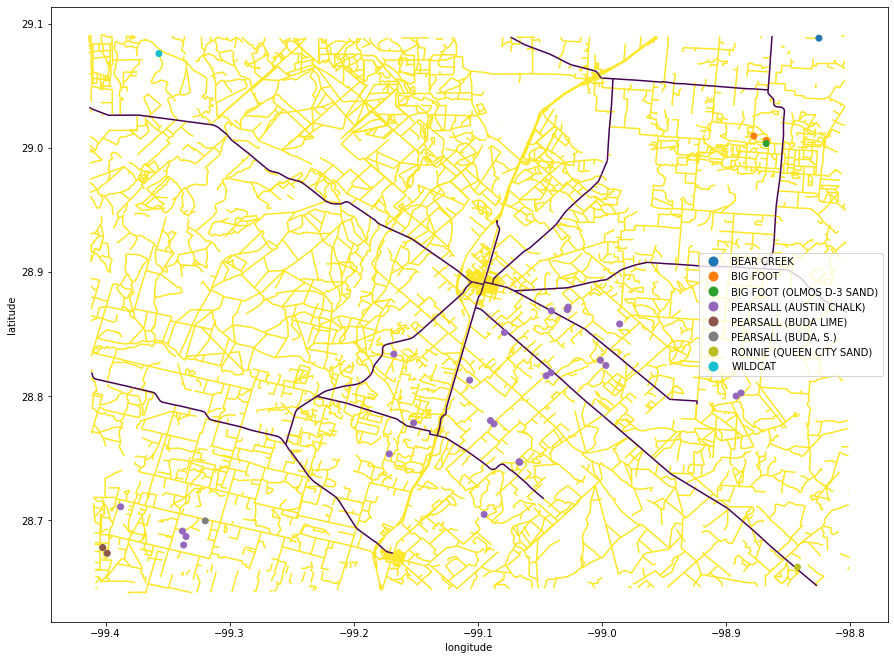

In [8]:
ax = basemap.plot(column='DISP_CODE', figsize=(15,15), zorder=0)
spatial.plot(column='FIELD_NAME', legend=True, ax=ax, zorder=1)

plt.xlabel('longitude')
plt.ylabel('latitude')

### Cluster the wells

In [9]:
CLUSTER_RADIUS = 1 #mile
clusters = [] # List of dataframes - each one containing a cluster of wells within ~ a [CLUSTER_RADIUS] mile radius

for i in spatial_valid.index:
    well = spatial_valid[spatial_valid.index==i]
    coordinates = (well['LONG83'].mean(), well['LAT83'].mean())
    findsCluster = False
    
    for j, C in enumerate(clusters):
        if angleToDist(coordinates, ( C['LONG83'].mean(), C['LAT83'].mean() ) ) < CLUSTER_RADIUS:
            temp = clusters[j].append(well) # if the well is close enough to a cluster, append it to the cluster dataframe
            clusters[j] = temp
            findsCluster = True
            break
        
    if not findsCluster: # otherwise create a new dataframe in the list
        clusters.append(well)
        
cluster_centers = [( C['LONG83'].mean(), C['LAT83'].mean() ) for C in clusters] # list of the centers of corresponding clusters

In [10]:
len(clusters)

21

Text(101.625, 0.5, 'latitude')

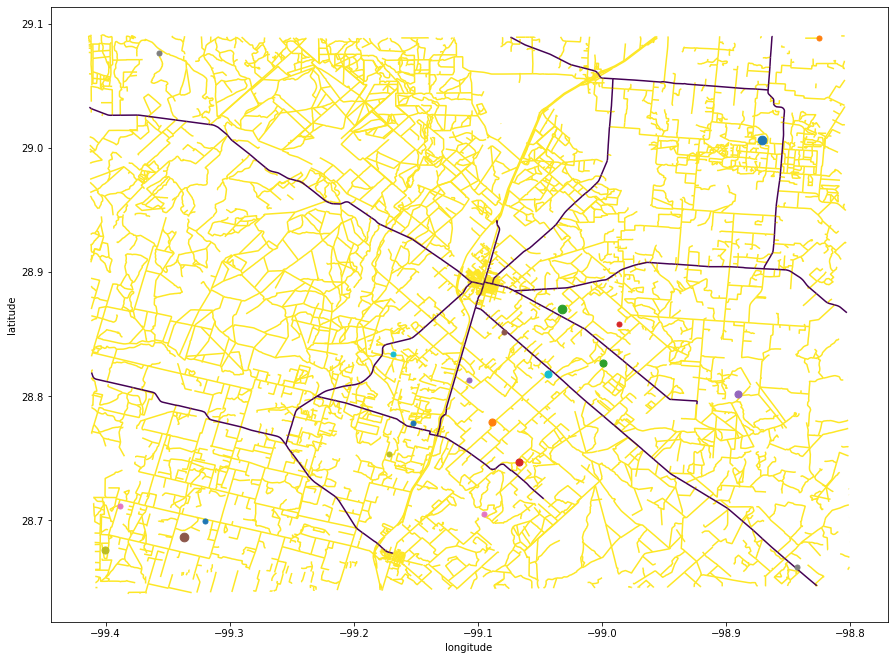

In [11]:
# Plot the clusters - the bigger the size, the greater the cluster
ax = basemap.plot(column='DISP_CODE', figsize=(15,15), zorder=0)
for i, C in enumerate(cluster_centers):
    plt.scatter(C[0], C[1], s=25*len(clusters[i]))

plt.xlabel('longitude')
plt.ylabel('latitude')

### Translate shapefile into Networkx Digraph

In [12]:
roads = nx.read_shp(r'Maps\Basemap163\road163l.shp')

for e in roads.edges.data():
    roads[e[0]][e[1]]['Distance'] = angleToDist(e[0], e[1])
    
    if (e[1], e[0]) not in roads.edges: # checks for duplicates
        roads.add_edge(e[1], e[0]) # adds inverse edge
        
        for A in e[2]:
            roads[e[1]][e[0]][A] = e[2][A]

In [13]:
nx.number_strongly_connected_components(roads)

67

In [14]:
strong_components = [c for c in sorted(nx.strongly_connected_components(roads), key=len, reverse=True)]
centers = [(sum(x[0] for x in c)/len(c), sum(x[1] for x in c)/len(c)) for c in strong_components]

In [15]:
def sq_dist(X, Y): # finds the squared euclidian distance between two tuples
    return (X[0]-Y[0])**2 + (X[1]-Y[1])**2


connected_roads = roads.copy()
conn_X, conn_Y = [], []

for c in strong_components[1:]:
    center = (sum(x[0] for x in c)/len(c), sum(x[1] for x in c)/len(c)) # finds center of the component
    
    main_node = (0,0) # finds closest point of main component to other
    for x in strong_components[0]:
        if sq_dist(x, center) < sq_dist(main_node, center):
            main_node = x
            
    side_node = (0,0) # finds closest point of other component to the previous point
    for x in c:
        if sq_dist(x, main_node) < sq_dist(side_node, main_node):
            side_node = x
            
    connected_roads.add_edge(main_node, side_node, Distance = angleToDist(main_node, side_node) )
    connected_roads.add_edge(side_node, main_node, Distance = angleToDist(main_node, side_node) )
    conn_X.append([main_node[0], side_node[0]]) # used for displaying added roads
    conn_Y.append([main_node[1], side_node[1]])

In [16]:
nx.number_strongly_connected_components(connected_roads)

1

Text(101.625, 0.5, 'latitude')

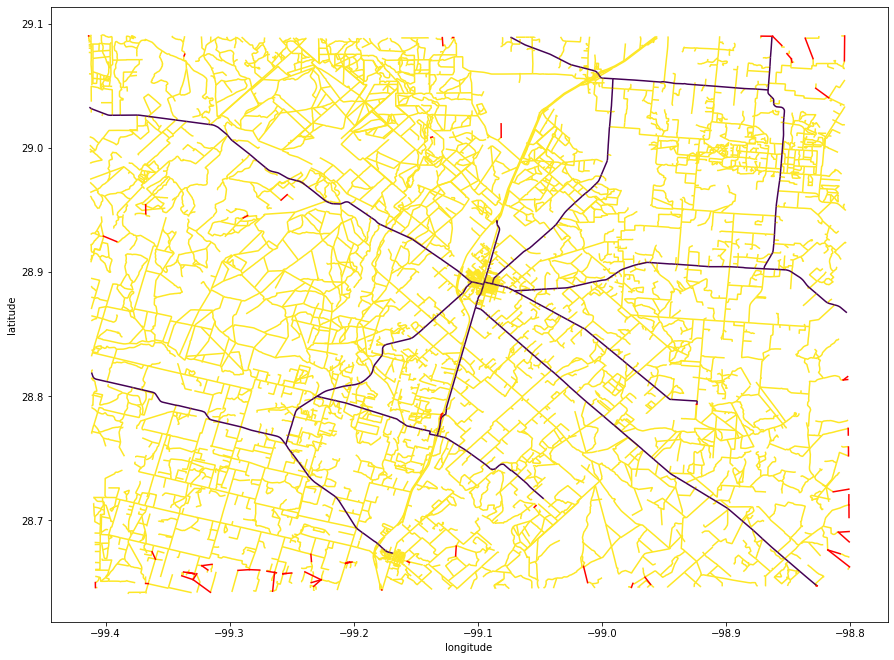

In [17]:
ax = basemap.plot(column='DISP_CODE', figsize=(15,15), zorder=0)

for i in range(len(conn_X)):
    plt.plot(conn_X[i], conn_Y[i], color='r')

plt.xlabel('longitude')
plt.ylabel('latitude')

### Add clusters to Digraph as nodes with an edge connected to the closest node already in the graph:

In [18]:
for i, C in enumerate(cluster_centers):
    coords = (C[0], C[1])
    
    closest = (0,0)
    for node in connected_roads.nodes:
        if angleToDist(coords, node) < angleToDist(coords, closest):
            closest = node
            
    connected_roads.add_node(coords, well=True, Size=len(clusters[i]))
            
    d = angleToDist(coords, closest)
    connected_roads.add_edge(coords, closest, Distance = d)
    connected_roads.add_edge(closest, coords, Distance = d)

In [19]:
# This cell acts as a test to determine if a path exists between each well
reachable = []

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        p1 = cluster_centers[i]
        p2 = cluster_centers[j]
        reachable.append((i, j, nx.has_path(connected_roads, p1, p2)))
        
len(reachable), sum(int(x[2]) for x in reachable) # We want both values to be equal

(210, 210)

### Running the Atascosa pather on this environment

Now that the environment for this new county is complete, we can iterate the learner that trained in Atascosa on this new county and see how well it generalizes.

In [21]:
from DQN_Methods import DQN
from DQN_Methods import METHODS
import torch

In [22]:
model = torch.load('Models\Atascosa_Batch.pth')
model.eval()

DQN(
  (fc1): Linear(in_features=6, out_features=12, bias=True)
  (relu): LeakyReLU(negative_slope=0.2)
  (fc2): Linear(in_features=12, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [20]:
newClusters = [(cluster_centers[i], len(clusters[i])) for i in range(len(clusters))]
newClusters

[((-98.87141117333333, 29.006542893333332), 3),
 ((-98.82564925, 29.08853153), 1),
 ((-98.99944020000001, 28.82701993), 2),
 ((-99.06691463, 28.747109095), 2),
 ((-98.890374855, 28.801498345), 2),
 ((-99.33706132000002, 28.686286586666668), 3),
 ((-99.38810153, 28.71106993), 1),
 ((-98.84288464, 28.66248792), 1),
 ((-99.17174476, 28.7536588), 1),
 ((-99.16805952, 28.83404264), 1),
 ((-99.15212862, 28.77859478), 1),
 ((-99.088817535, 28.779173264999997), 2),
 ((-99.03240148666667, 28.87024327), 3),
 ((-98.98616475, 28.85834173), 1),
 ((-99.10698594, 28.81307602), 1),
 ((-99.07902674, 28.85148422), 1),
 ((-99.09534406, 28.70490921), 1),
 ((-99.35729859, 29.07610927), 1),
 ((-99.40075357500001, 28.675929895), 2),
 ((-99.04336103, 28.81782316), 2),
 ((-99.31994956, 28.69972561), 1)]

In [25]:
M = METHODS(connected_roads, model, newClusters)
M.eval()

Check
10.292911622154609
29.6072590126423
15.575346668031711
23.07813196966276
5.187799049174634
8.86208129590176
4.160569803581373
4.270999449944542
3.26435412247636
5.783630165552502
7.93479291513438
6.874144405717614
7.603233421108383
10.41202899379399
9.586923289110153
19.36109014973911
3.0030838651536946
6.6388158940292055
3.303663652887307
42.99778668160106


(227.79864642739744,
 [0, 1, 4, 7, 3, 16, 11, 19, 2, 13, 12, 15, 14, 10, 9, 8, 5, 20, 6, 18, 17])

In [26]:
model2 = DQN()
M2 = METHODS(connected_roads, model2, newClusters)
SCORES = M2.train(300)

Episode # 0
Optimal Path: [0, 1, 4, 12, 3, 16, 10, 18]
Learner Path: [0, 1, 10, 3, 4, 18, 12, 16]
Episode # 1
Optimal Path: [0, 4, 7, 3, 19, 14, 6, 18]
Learner Path: [0, 3, 7, 4, 18, 6, 19, 14]
Episode # 2
Optimal Path: [0, 7, 2, 19, 14, 8, 20, 18]
Learner Path: [0, 18, 8, 20, 14, 7, 19, 2]
Episode # 3
Optimal Path: [0, 1, 4, 12, 13, 2, 16, 20]
Learner Path: [0, 1, 4, 12, 16, 20, 2, 13]
Episode # 4
Optimal Path: [0, 1, 4, 19, 3, 5, 18, 17]
Learner Path: [0, 1, 17, 3, 5, 4, 19, 18]
Episode # 5
Optimal Path: [0, 13, 2, 19, 3, 10, 9, 6]
Learner Path: [0, 19, 10, 13, 9, 2, 6, 3]
Episode # 6
Optimal Path: [0, 4, 2, 15, 16, 8, 20, 6]
Learner Path: [0, 4, 2, 15, 8, 16, 20, 6]
Episode # 7
Optimal Path: [0, 13, 14, 3, 16, 10, 5, 18]
Learner Path: [0, 18, 5, 13, 16, 3, 10, 14]
Episode # 8
Optimal Path: [0, 1, 13, 14, 11, 16, 8, 5]
Learner Path: [0, 8, 5, 13, 11, 14, 16, 1]
Episode # 9
Optimal Path: [0, 7, 11, 14, 9, 8, 5, 17]
Learner Path: [0, 11, 7, 9, 14, 8, 17, 5]
Episode # 10
Optimal Path: [

Optimal Path: [0, 13, 19, 3, 8, 5, 18, 6]
Learner Path: [0, 13, 19, 3, 8, 18, 6, 5]
Episode # 85
Optimal Path: [0, 4, 12, 2, 16, 5, 18, 6]
Learner Path: [0, 4, 2, 12, 6, 18, 5, 16]
Episode # 86
Optimal Path: [0, 1, 2, 12, 15, 11, 10, 18]
Learner Path: [0, 1, 2, 12, 15, 11, 10, 18]
Episode # 87
Optimal Path: [0, 4, 11, 3, 16, 10, 8, 9]
Learner Path: [0, 4, 11, 10, 9, 8, 3, 16]
Episode # 88
Optimal Path: [0, 1, 13, 14, 3, 16, 10, 6]
Learner Path: [0, 3, 16, 14, 10, 13, 1, 6]
Episode # 89
Optimal Path: [0, 4, 13, 2, 15, 14, 10, 6]
Learner Path: [0, 4, 6, 10, 2, 13, 14, 15]
Episode # 90
Optimal Path: [0, 1, 4, 7, 13, 11, 10, 9]
Learner Path: [0, 1, 7, 4, 13, 11, 10, 9]
Episode # 91
Optimal Path: [0, 1, 12, 15, 19, 16, 20, 17]
Learner Path: [0, 1, 12, 19, 15, 16, 20, 17]
Episode # 92
Optimal Path: [0, 7, 12, 19, 3, 14, 5, 20]
Learner Path: [0, 19, 12, 7, 3, 14, 5, 20]
Episode # 93
Optimal Path: [0, 13, 12, 2, 3, 10, 8, 6]
Learner Path: [0, 13, 12, 2, 3, 10, 8, 6]
Episode # 94
Optimal Path: 

Optimal Path: [0, 1, 15, 9, 8, 3, 16, 7]
Learner Path: [0, 1, 15, 9, 3, 8, 16, 7]
Episode # 168
Optimal Path: [0, 7, 11, 19, 12, 9, 6, 18]
Learner Path: [0, 7, 19, 12, 11, 9, 18, 6]
Episode # 169
Optimal Path: [0, 7, 13, 19, 15, 11, 3, 18]
Learner Path: [0, 3, 19, 13, 11, 15, 7, 18]
Episode # 170
Optimal Path: [0, 4, 12, 2, 19, 11, 14, 20]
Learner Path: [0, 4, 2, 12, 19, 11, 14, 20]
Episode # 171
Optimal Path: [0, 4, 2, 12, 15, 11, 14, 18]
Learner Path: [0, 4, 2, 18, 14, 11, 15, 12]
Episode # 172
Optimal Path: [0, 4, 13, 15, 14, 8, 6, 18]
Learner Path: [0, 4, 13, 14, 15, 18, 6, 8]
Episode # 173
Optimal Path: [0, 12, 7, 3, 10, 9, 20, 17]
Learner Path: [0, 12, 7, 3, 10, 9, 20, 17]
Episode # 174
Optimal Path: [0, 4, 7, 12, 15, 11, 3, 20]
Learner Path: [0, 4, 7, 3, 20, 11, 15, 12]
Episode # 175
Optimal Path: [0, 4, 19, 11, 15, 14, 9, 6]
Learner Path: [0, 4, 19, 11, 15, 14, 9, 6]
Episode # 176
Optimal Path: [0, 1, 13, 12, 15, 10, 6, 18]
Learner Path: [0, 1, 13, 12, 15, 10, 6, 18]
Episode # 

Learner Path: [0, 2, 12, 15, 10, 8, 9, 17]
Episode # 252
Optimal Path: [0, 12, 11, 14, 10, 20, 6, 18]
Learner Path: [0, 12, 11, 20, 18, 6, 10, 14]
Episode # 253
Optimal Path: [0, 1, 19, 11, 14, 8, 20, 17]
Learner Path: [0, 1, 11, 19, 14, 8, 20, 17]
Episode # 254
Optimal Path: [0, 7, 19, 3, 20, 5, 18, 17]
Learner Path: [0, 7, 3, 18, 5, 20, 19, 17]
Episode # 255
Optimal Path: [0, 2, 15, 16, 8, 5, 20, 17]
Learner Path: [0, 2, 20, 5, 16, 8, 15, 17]
Episode # 256
Optimal Path: [0, 4, 7, 12, 2, 3, 20, 17]
Learner Path: [0, 12, 4, 7, 3, 20, 2, 17]
Episode # 257
Optimal Path: [0, 13, 2, 12, 15, 17, 6, 18]
Learner Path: [0, 13, 2, 12, 15, 17, 6, 18]
Episode # 258
Optimal Path: [0, 4, 2, 19, 15, 3, 10, 20]
Learner Path: [0, 4, 2, 19, 15, 3, 20, 10]
Episode # 259
Optimal Path: [0, 13, 2, 11, 16, 20, 6, 18]
Learner Path: [0, 13, 2, 11, 6, 18, 20, 16]
Episode # 260
Optimal Path: [0, 1, 7, 11, 14, 8, 18, 17]
Learner Path: [0, 1, 11, 7, 14, 8, 18, 17]
Episode # 261
Optimal Path: [0, 13, 12, 15, 3, 16

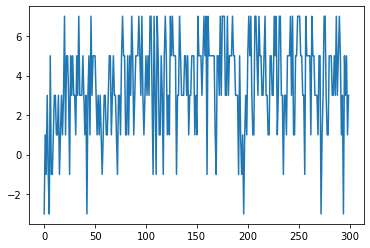

In [27]:
plt.plot(SCORES)

Check


MovieWriter ffmpeg unavailable; using Pillow instead.


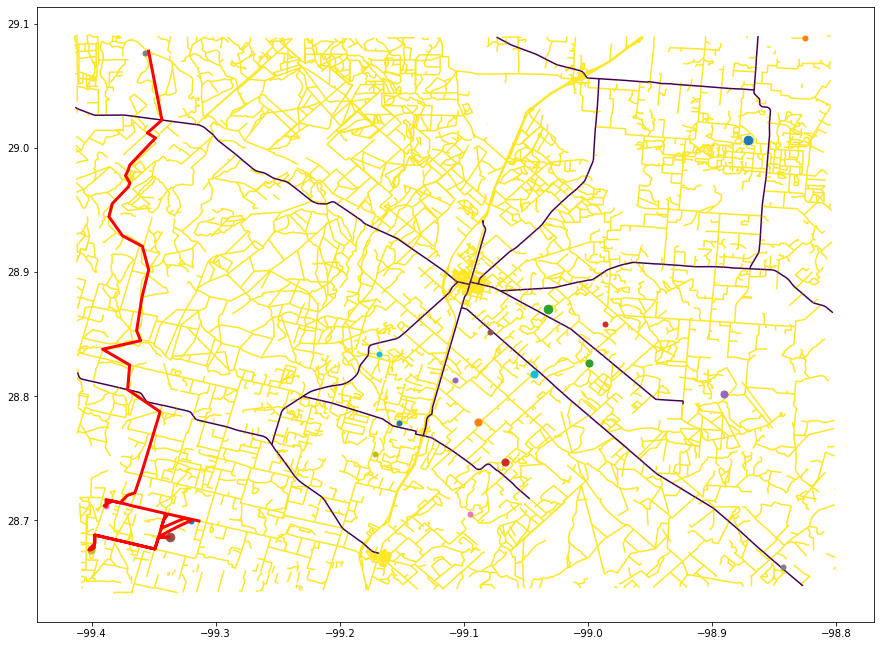

In [28]:
M2.getAnimation(r'Maps\Basemap163\road163l.shp', 'temp', line_length=60, frameSkip=2, fps=3000)